# Chapter 12

Tensors

In [1]:
import torch
import numpy as np

In [2]:
a = [1, 2, 3]
b = np.array([4, 5, 6])

In [3]:
t_a = torch.tensor(a)
t_b = torch.tensor(b)

In [4]:
t_a

tensor([1, 2, 3])

In [5]:
t_b

tensor([4, 5, 6])

## Pipelines in Pytorch

We can easily build a data loader that allows us to iterate over the data.

In [2]:
from torch.utils.data import DataLoader

In [3]:
t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)

In [4]:
for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


We can also create batches of data.

In [5]:
data_loader = DataLoader(t, batch_size=3, drop_last=False)

for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', batch)

batch 1: tensor([0., 1., 2.])
batch 2: tensor([3., 4., 5.])


### Combine tensors into a dataset

In [6]:
torch.manual_seed(1)
t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)

In [7]:
from torch.utils.data import Dataset

In [8]:
class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [9]:
join_dataset = JointDataset(t_x, t_y)

In [10]:
for example in join_dataset:
    print(f'x: {example[0]}, y: {example[1]}')

x: tensor([0.7576, 0.2793, 0.4031]), y: 0
x: tensor([0.7347, 0.0293, 0.7999]), y: 1
x: tensor([0.3971, 0.7544, 0.5695]), y: 2
x: tensor([0.4388, 0.6387, 0.5247]), y: 3


We can use diretcly from `utils.data`

In [11]:
from torch.utils.data import TensorDataset

In [12]:
join_dataset = TensorDataset(t_x, t_y)

In [21]:
for example in join_dataset:
    print(f'x: {example[0]}, y: {example[1]}')

x: tensor([0.7576, 0.2793, 0.4031]), y: 0
x: tensor([0.7347, 0.0293, 0.7999]), y: 1
x: tensor([0.3971, 0.7544, 0.5695]), y: 2
x: tensor([0.4388, 0.6387, 0.5247]), y: 3


### Shuffle, batch, and repeat

In [13]:
torch.manual_seed(1)
data_loader = DataLoader(dataset=join_dataset, batch_size=2, shuffle=True)

In [14]:
for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}, x: {batch[0]}, y:{batch[1]}')

batch 1, x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]), y:tensor([2, 0])
batch 2, x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]), y:tensor([1, 3])


In [15]:
for epoch in range(2):
    print(f'epoch {epoch+1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}, x: {batch[0]}, y:{batch[1]}')

epoch 1
batch 1, x: tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]), y:tensor([0, 2])
batch 2, x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]), y:tensor([1, 3])
epoch 2
batch 1, x: tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]), y:tensor([3, 2])
batch 2, x: tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]), y:tensor([0, 1])


### Dataset from files

In [16]:
import pathlib

In [17]:
imgdir_path = pathlib.Path('images/chapter_12/cat_dog_images')
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])
print(file_list)

['images/chapter_12/cat_dog_images/cat-01.jpg', 'images/chapter_12/cat_dog_images/cat-02.jpg', 'images/chapter_12/cat_dog_images/cat-03.jpg', 'images/chapter_12/cat_dog_images/dog-01.jpg', 'images/chapter_12/cat_dog_images/dog-02.jpg', 'images/chapter_12/cat_dog_images/dog-03.jpg']


In [18]:
import matplotlib.pyplot as plt
import os
from PIL import Image

Image shape: (900, 1200, 3)
Image shape: (900, 1200, 3)
Image shape: (900, 742, 3)
Image shape: (800, 1200, 3)
Image shape: (800, 1200, 3)
Image shape: (900, 1200, 3)


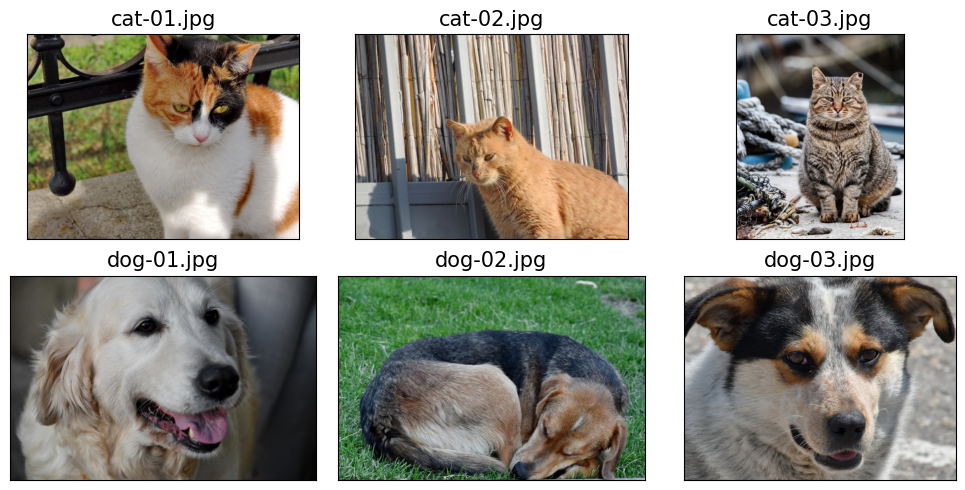

In [19]:
fig = plt.figure(figsize=(10, 5))

for i, file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape:', np.array(img).shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
plt.tight_layout()
plt.show()

In [20]:
labels = [1 if 'dog' in os.path.basename(file) else 0 for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [21]:
class ImageDataset(Dataset):
    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels = labels
        
    def __getitem__(self, index):
        file = self.file_list[index]
        label = self.labels[index]
        return file, label
    
    def __len__(self):
        return len(self.labels)

In [22]:
image_dataset = ImageDataset(file_list, labels)

In [23]:
for file, label in image_dataset:
    print(file, label)

images/chapter_12/cat_dog_images/cat-01.jpg 0
images/chapter_12/cat_dog_images/cat-02.jpg 0
images/chapter_12/cat_dog_images/cat-03.jpg 0
images/chapter_12/cat_dog_images/dog-01.jpg 1
images/chapter_12/cat_dog_images/dog-02.jpg 1
images/chapter_12/cat_dog_images/dog-03.jpg 1


In [24]:
import torchvision.transforms as transforms

img_height, img_width = 80, 120

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width))
])

Now, lets update the class

In [25]:
class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform
        
    def __getitem__(self, index):
        img = Image.open(self.file_list[index])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label
    
    def __len__(self):
        return len(self.labels)

In [26]:
image_dataset = ImageDataset(file_list, labels, transform)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.000551827..1.0000002].


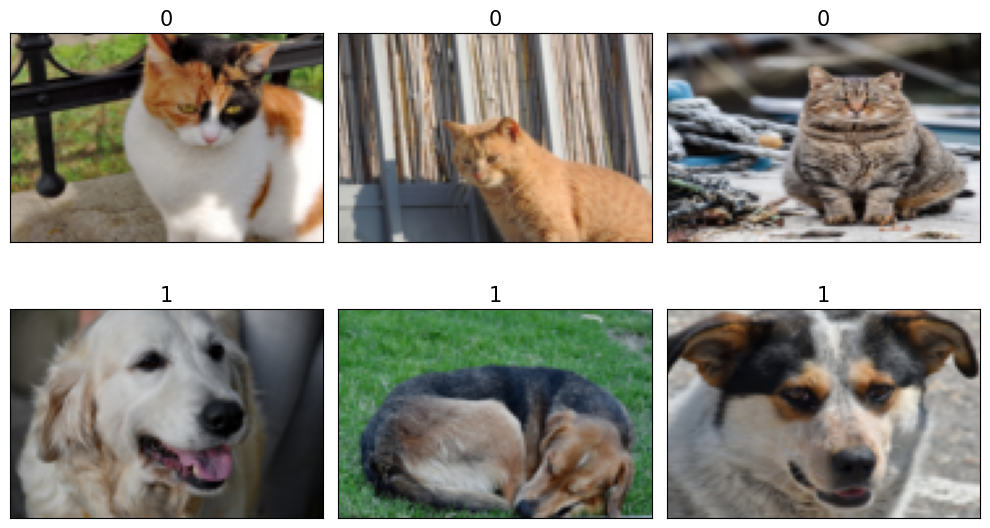

In [28]:
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i+1) 
    ax.set_xticks([]); ax.set_yticks([]) 
    ax.imshow(example[0].numpy().transpose((1, 2, 0))) 
    ax.set_title(f'{example[1]}', size=15)
plt.tight_layout() 
plt.show()

### Fetching datasets

In [29]:
import torchvision

In [31]:
image_path = 'images/chapter_12'
celeba_dataset = torchvision.datasets.CelebA(
    image_path, split='train', target_type='attr', download=True
)

Downloading...
From (original): https://drive.google.com/uc?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM
From (redirected): https://drive.usercontent.google.com/download?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM&confirm=t&uuid=992068f3-804d-449c-abe3-9709abd30f11
To: /home/silvag2/projects/deep_learning/deep_learning/images/chapter_12/celeba/img_align_celeba.zip
100%|██████████| 1.44G/1.44G [01:02<00:00, 23.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=0B7EVK8r0v71pblRyaVFSWGxPY0U
To: /home/silvag2/projects/deep_learning/deep_learning/images/chapter_12/celeba/list_attr_celeba.txt
100%|██████████| 26.7M/26.7M [00:02<00:00, 11.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_ee_0u7vcNLOfNLegJRHmolfH5ICW-XS
To: /home/silvag2/projects/deep_learning/deep_learning/images/chapter_12/celeba/identity_CelebA.txt
100%|██████████| 3.42M/3.42M [00:00<00:00, 6.56MB/s]
Downloading...
From: https://drive.google.com/uc?id=0B7EVK8r0v71pbThiMVRxWXZ4dU0
To: /home/silvag2/projects/deep_learning/deep_lear

In [32]:
assert isinstance(celeba_dataset, torch.utils.data.Dataset)

In [33]:
example = next(iter(celeba_dataset))
print(example)

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x789CD43184A0>, tensor([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1]))


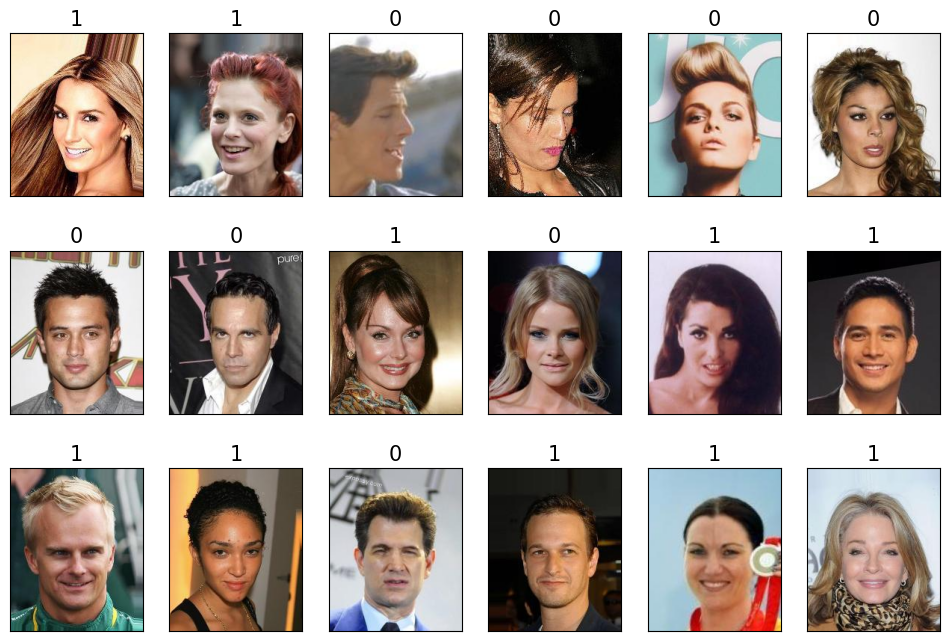

In [34]:
from itertools import islice 
fig = plt.figure(figsize=(12, 8)) 
for i, (image, attributes) in islice(enumerate(celeba_dataset), 18): 
    ax = fig.add_subplot(3, 6, i+1) 
    ax.set_xticks([]); ax.set_yticks([]) 
    ax.imshow(image) 
    ax.set_title(f'{attributes[31]}', size=15)
plt.show()

### Fetch MNIST

100.0%
100.0%
100.0%
100.0%


(<PIL.Image.Image image mode=L size=28x28 at 0x789CD4432EA0>, 5)


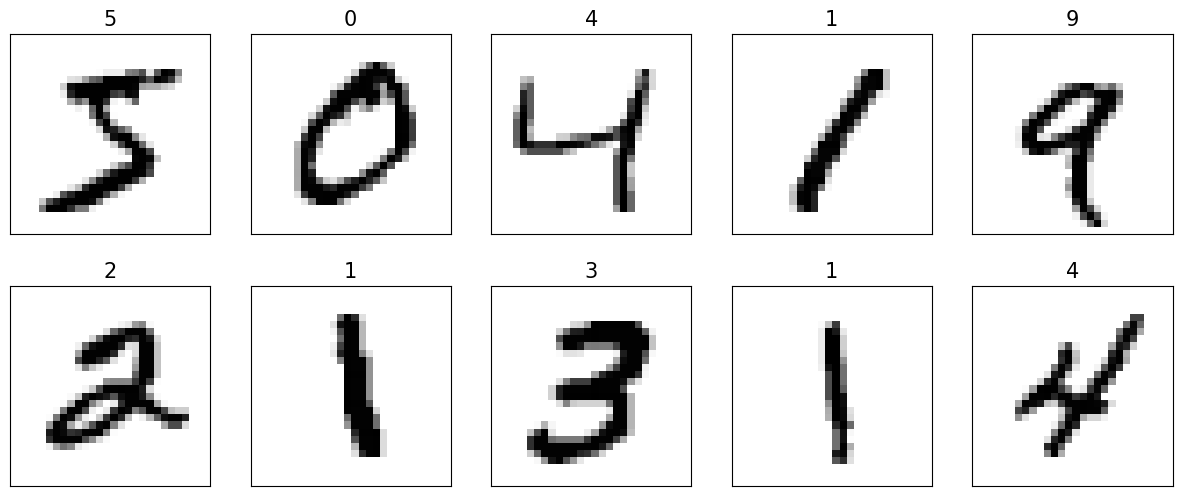

In [35]:
mnist_dataset = torchvision.datasets.MNIST(image_path, 'train', download=True)

assert isinstance(mnist_dataset, torch.utils.data.Dataset)

example = next(iter(mnist_dataset))
print(example)

fig = plt.figure(figsize=(15, 6))
for i, (image, label) in islice(enumerate(mnist_dataset), 10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}', size=15)

#plt.savefig('figures/12_06.pdf')
plt.show()

## Build an NN

### Linear Regression Model

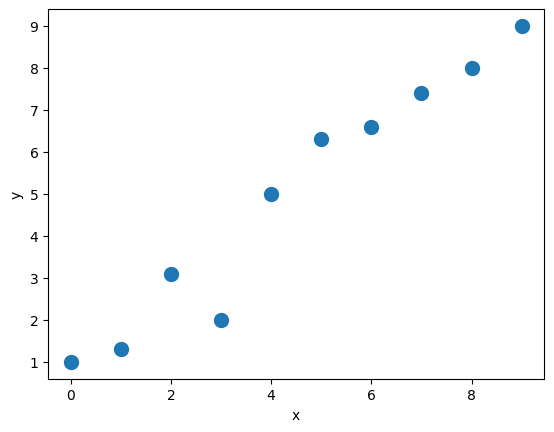

In [ ]:
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 
                    7.4, 8.0, 9.0], dtype='float32')

plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [39]:
from torch.utils.data import TensorDataset

X_train_norm = (X_train - X_train.mean()) / X_train.std()
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train)


In [40]:
train_ds = TensorDataset(X_train_norm, y_train)

In [41]:
train_dl = DataLoader(dataset=train_ds, batch_size=1, shuffle=True)

In [43]:
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)

def model(xb):
    return xb @ weight + bias

In [44]:
def loss_fn(input, target):
    return (input - target).pow(2).mean()

In [45]:
learning_rate = 0.001
num_epochs = 200
log_epochs = 10

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()

        with torch.no_grad():
            weight -= weight.grad * learning_rate
            bias -= bias.grad * learning_rate
            weight.grad.zero_()
            bias.grad.zero_()
 
    if epoch % log_epochs==0:
        print(f'Epoch {epoch}  Loss {loss.item():.4f}')

Epoch 0  Loss 45.0782
Epoch 10  Loss 26.4366
Epoch 20  Loss 1.5918
Epoch 30  Loss 14.1307
Epoch 40  Loss 11.6038
Epoch 50  Loss 6.3084
Epoch 60  Loss 0.6349
Epoch 70  Loss 3.1374
Epoch 80  Loss 1.9999
Epoch 90  Loss 0.3133
Epoch 100  Loss 0.7653
Epoch 110  Loss 1.0039
Epoch 120  Loss 0.0235
Epoch 130  Loss 0.5176
Epoch 140  Loss 0.0759
Epoch 150  Loss 1.8789
Epoch 160  Loss 0.0008
Epoch 170  Loss 0.0866
Epoch 180  Loss 0.0646
Epoch 190  Loss 0.0011


Final Parameters: 2.6696107387542725 4.879678249359131


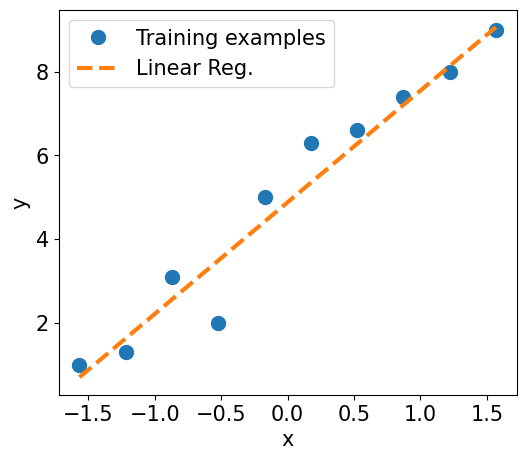

In [46]:
print('Final Parameters:', weight.item(), bias.item())
 
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
 
#plt.savefig('figures/12_08.pdf')

plt.show()

### Use torch.nn and torch.optim

In [47]:
import torch.nn as nn

In [49]:
loss_fn = nn.MSELoss(reduction='mean')
input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [50]:
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        # 1. generate predictions
        pred = model(x_batch)
        
        # 2. calculate loss
        loss = loss_fn(pred, y_batch)
        
        # 3. compute gradients
        loss.backward()
        
        # 4. update parameters using gradients
        optimizer.step()
        
        # 5. reset gradients to zero
        optimizer.zero_grad()
    
    if epoch % log_epochs==0:
        print(f'Epoch {epoch} Loss {loss.item():.4f}')

/home/silvag2/.virtualenvs/dl/lib/python3.12/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0 Loss 27.5217
Epoch 10 Loss 5.4938
Epoch 20 Loss 25.5754
Epoch 30 Loss 22.2742
Epoch 40 Loss 11.9622
Epoch 50 Loss 0.0745
Epoch 60 Loss 7.0669
Epoch 70 Loss 4.6566
Epoch 80 Loss 2.1235
Epoch 90 Loss 0.7432
Epoch 100 Loss 0.0600
Epoch 110 Loss 1.0181
Epoch 120 Loss 0.7559
Epoch 130 Loss 0.2016
Epoch 140 Loss 0.3912
Epoch 150 Loss 0.1100
Epoch 160 Loss 0.2599
Epoch 170 Loss 0.4352
Epoch 180 Loss 0.1192
Epoch 190 Loss 0.0689


In [51]:
print('Final Parameters:', model.weight.item(), model.bias.item())

Final Parameters: 2.6411759853363037 4.87037992477417


## Multilayer perceptron for classifying flowers

In [52]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

In [55]:
X = iris['data']
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1./3, random_state=1)

In [56]:
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train) 

train_ds = TensorDataset(X_train_norm, y_train)

torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [57]:
for x, y in train_dl:
    print(x, y)

tensor([[ 1.1447, -0.4353,  0.0234, -1.2507],
        [ 0.8899,  0.0234, -0.9959, -1.6585]]) tensor([1, 0])
tensor([[ 1.9092,  0.0744,  1.3486, -0.4862],
        [ 2.1641,  0.1763,  1.6544, -0.6391]]) tensor([2, 2])
tensor([[ 2.1641, -0.3333,  1.6544, -0.7411],
        [ 1.3486, -0.3333,  0.2783, -1.0978]]) tensor([2, 1])
tensor([[ 1.4505, -0.0275,  1.0938, -0.5372],
        [ 1.5015, -0.3333,  1.0938, -0.6391]]) tensor([2, 2])
tensor([[ 0.8389, -0.0275, -0.9959, -1.6585],
        [ 0.5841, -0.0275, -1.0469, -1.6075]]) tensor([0, 0])
tensor([[ 1.1957, -0.3843,  0.3292, -1.2507],
        [ 0.7880, -0.0785, -1.0469, -1.6585]]) tensor([1, 0])
tensor([[ 1.1957, -0.3843,  0.2273, -1.1488],
        [ 0.7370,  0.0744, -1.0469, -1.7094]]) tensor([1, 0])
tensor([[ 1.2976, -0.0275,  0.5331, -0.9449],
        [ 0.7880, -0.0275, -0.9449, -1.5565]]) tensor([1, 0])
tensor([[ 1.1447, -0.2824,  0.3802, -1.0978],
        [ 0.8389,  0.1763, -0.9449, -1.6585]]) tensor([1, 0])
tensor([[ 1.5525, -0.1295,  

In [62]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = self.layer1(x)
        x= nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)
        return x

In [63]:
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
model = Model(input_size, hidden_size, output_size)

In [64]:
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [65]:
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        
        # 1. get predictions
        pred = model(x_batch)
        
        # 2. loss
        loss = loss_fn(pred, y_batch)
        
        # 3. grad
        loss.backward()
        
        # 4. step
        optimizer.step()
        
        #5. zero grad
        optimizer.zero_grad()
        
        # 6. 
        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.mean()
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)

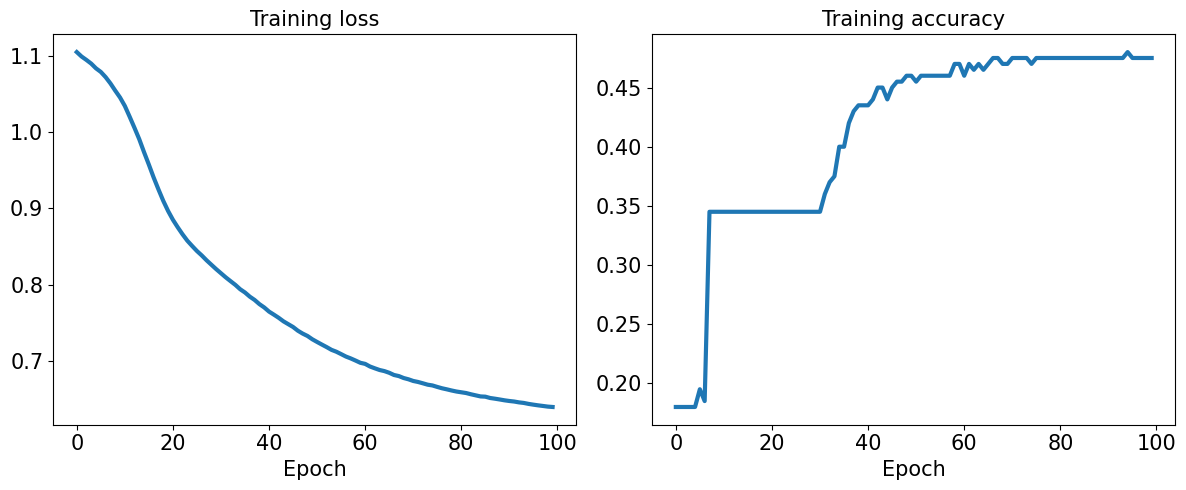

In [66]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

#plt.savefig('figures/12_09.pdf')
 
plt.show()

### Evaluating the trained model on the test dataset



In [67]:


X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test) 
pred_test = model(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
 
print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.9800


### Save the model

In [71]:
path = 'models/iris_classifier.pt' 
torch.save(model, path)

In [73]:
model_new = torch.load(path, weights_only=False)

In [74]:
model_new.eval()

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

In [75]:
pred_test = model_new(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
 
print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.9800


In [76]:
path = 'models/iris_classifier_state.pt'
torch.save(model.state_dict(), path)

In [77]:
model_new = Model(input_size, hidden_size, output_size)
model_new.load_state_dict(torch.load(path))

<All keys matched successfully>

## Activation functions

In [1]:
import numpy as np


X = np.array([1, 1.4, 2.5]) ## first value must be 1
w = np.array([0.4, 0.3, 0.5])

def net_input(X, w):
    return np.dot(X, w)

def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))

def logistic_activation(X, w):
    z = net_input(X, w)
    return logistic(z)

print(f'P(y=1|x) = {logistic_activation(X, w):.3f}') 

P(y=1|x) = 0.888
